In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-02-17 10:24:49.120154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-17 10:24:49.354188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-17 10:24:49.355044: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
df = pd.read_csv('data/final.zip')
df.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,TOXIC,...,word_counts,unique_word_counts,clean_text,tokenized,tokenized_no_stopwords,tokenized_stemmed,tokenized_pos,tokenized_lemmatized,tokenized_lemmatized_pos,tokenized_bigram
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,...,43,41,explanation why the edits made under my userna...,"['explanation', 'why', 'the', 'edits', 'made',...","['explanation', 'edits', 'made', 'username', '...","['explan', 'edit', 'made', 'usernam', 'hardcor...","[('explanation', 'NN'), ('edits', 'NNS'), ('ma...","['explanation', 'edits', 'made', 'username', '...","['explanation', 'edits', 'make', 'username', '...","[('explanation', 'edits'), ('edits', 'made'), ..."
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,...,17,17,daww he matches this background colour i am se...,"['daww', 'he', 'matches', 'this', 'background'...","['daww', 'matches', 'background', 'colour', 's...","['daww', 'match', 'background', 'colour', 'see...","[('daww', 'NN'), ('matches', 'NNS'), ('backgro...","['daww', 'match', 'background', 'colour', 'see...","['daww', 'match', 'background', 'colour', 'see...","[('daww', 'matches'), ('matches', 'background'..."
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,...,42,39,hey man i am really not trying to edit war it ...,"['hey', 'man', 'i', 'am', 'really', 'not', 'tr...","['hey', 'man', 'really', 'trying', 'edit', 'wa...","['hey', 'man', 'realli', 'tri', 'edit', 'war',...","[('hey', 'NN'), ('man', 'NN'), ('really', 'RB'...","['hey', 'man', 'really', 'trying', 'edit', 'wa...","['hey', 'man', 'really', 'try', 'edit', 'war',...","[('hey', 'man'), ('man', 'really'), ('really',..."
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,...,113,82,more i cannot make any real suggestions on im...,"['more', 'i', 'can', 'not', 'make', 'any', 're...","['make', 'real', 'suggestions', 'improvement',...","['make', 'real', 'suggest', 'improv', 'wonder'...","[('make', 'VB'), ('real', 'JJ'), ('suggestions...","['make', 'real', 'suggestion', 'improvement', ...","['make', 'real', 'suggestion', 'improvement', ...","[('make', 'real'), ('real', 'suggestions'), ('..."
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,...,13,13,you sir are my hero any chance you remember wh...,"['you', 'sir', 'are', 'my', 'hero', 'any', 'ch...","['sir', 'hero', 'chance', 'remember', 'page']","['sir', 'hero', 'chanc', 'rememb', 'page']","[('sir', 'NN'), ('hero', 'NN'), ('chance', 'NN...","['sir', 'hero', 'chance', 'remember', 'page']","['sir', 'hero', 'chance', 'remember', 'page']","[('sir', 'hero'), ('hero', 'chance'), ('chance..."


In [5]:
#https://tfhub.dev/google/collections/bert/1

#text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/2",
    trainable=False)

2022-02-17 10:58:10.434091: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-17 10:58:10.434690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-17 10:58:10.434962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-17 10:58:10.435098: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [6]:
text_test = ['this is such an amazing movie!']
text_preprocessed = preprocessor(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_word_ids', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
bert_results = encoder(text_preprocessed)

print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[ 0.17883608 -0.23532835  0.9570172  -0.3906763  -0.2085967  -0.99966097
  0.18750496  0.50107193 -0.43959424 -0.20681717  0.47851393 -0.4799853 ]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[ 0.23163514  0.3788125   0.20612112 ... -0.16753744  0.31791183
  -0.05594893]
 [ 0.7114476   0.05240248  0.40399325 ... -0.23849669  0.06221118
  -0.11749859]
 [ 0.31278396 -0.20193669  0.31673113 ...  0.22400162  0.6884665
  -0.6795133 ]
 ...
 [ 0.19328581  0.37243676  0.57984734 ... -0.25043383 -0.15593131
   0.27656507]
 [ 0.26625997  0.2377779   0.54345345 ... -0.14922889 -0.23860916
   0.24579997]
 [ 0.1194103   0.5005058   0.36981496 ... -0.18295828 -0.08711461
   0.33573163]]


In [141]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", name='preprocessing')
    encoder_inputs = preprocessor(text_input)
    encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2", trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(50, activation='sigmoid')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
    return tf.keras.Model(inputs=[text_input], outputs=[net])

In [142]:
model = build_classifier_model()
#bert_raw_result = classifier_model(tf.constant(df.comment_text[0]))
#print(tf.sigmoid(bert_raw_result))

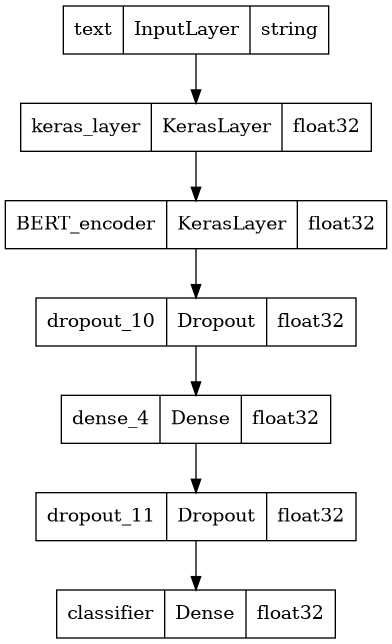

In [143]:
tf.keras.utils.plot_model(model, show_dtype=True)

In [144]:
from sklearn.model_selection import train_test_split

df['clean_text'] = df['clean_text'].apply(lambda x: str(x).rstrip())

X = df.clean_text
y = df['TOXIC']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
#convert to tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(64)

In [146]:
from transformers import create_optimizer

batch_size = 64
epochs  = 4
batches_per_epoch = len(X_train) // batch_size
total_train_steps = int(batches_per_epoch * epochs)

optimizer, schedule = create_optimizer(
    init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps
)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='acc')

In [147]:
batches_per_epoch, total_train_steps

(2794, 11176)

In [149]:
history = model.fit(X_train, y_train,
                       validation_data=(X_val, y_val),
                       epochs=epochs)

Epoch 1/4
5589/5589 [==============================] - 365s 65ms/step - loss: 0.1614 - acc: 0.9463 - val_loss: 0.1315 - val_acc: 0.9529
Epoch 2/4
5589/5589 [==============================] - 361s 65ms/step - loss: 0.1375 - acc: 0.9504 - val_loss: 0.1269 - val_acc: 0.9535
Epoch 3/4
5589/5589 [==============================] - 363s 65ms/step - loss: 0.1352 - acc: 0.9509 - val_loss: 0.1269 - val_acc: 0.9535
Epoch 4/4
5589/5589 [==============================] - 363s 65ms/step - loss: 0.1348 - acc: 0.9510 - val_loss: 0.1269 - val_acc: 0.9535


In [150]:
history.history

{'loss': [0.16135714948177338,
  0.13753026723861694,
  0.13515250384807587,
  0.13482336699962616],
 'acc': [0.9462589025497437,
  0.9503520131111145,
  0.9509335160255432,
  0.9510397911071777],
 'val_loss': [0.13152329623699188,
  0.1268678605556488,
  0.1268678605556488,
  0.1268678605556488],
 'val_acc': [0.9528740644454956,
  0.9535003304481506,
  0.9535003304481506,
  0.9535003304481506]}

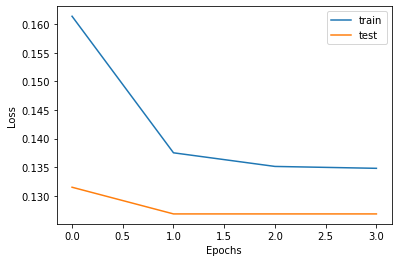

In [151]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

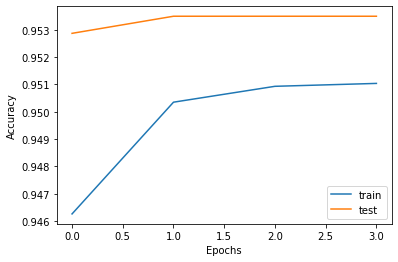

In [152]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [153]:
predictions = model.predict(X_val)

In [154]:
y_pred = np.round(predictions)

In [155]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     40225
           1       0.79      0.73      0.76      4485

    accuracy                           0.95     44710
   macro avg       0.88      0.86      0.87     44710
weighted avg       0.95      0.95      0.95     44710



---

# transformers library (tf)

In [19]:
import transformers
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification

ModuleNotFoundError: No module named 'transformers'

In [7]:
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [8]:
tokenizer(df.comment_text[0])

{'input_ids': [101, 7526, 2339, 1996, 10086, 2015, 2081, 2104, 2026, 5310, 18442, 13076, 12392, 2050, 5470, 2020, 16407, 1029, 2027, 4694, 1005, 1056, 3158, 9305, 22556, 1010, 2074, 8503, 2006, 2070, 3806, 2044, 1045, 5444, 2012, 2047, 2259, 14421, 6904, 2278, 1012, 1998, 3531, 2123, 1005, 1056, 6366, 1996, 23561, 2013, 1996, 2831, 3931, 2144, 1045, 1005, 1049, 3394, 2085, 1012, 6486, 1012, 16327, 1012, 4229, 1012, 2676, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [9]:
model = TFAutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [10]:
from sklearn.model_selection import train_test_split

X = df.comment_text.sample(frac = 0.1, random_state=42)
y = df['class'][X.index]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#tokenize the text
X_train_enc = tokenizer(list(X_train), truncation=True, padding=True)
X_val_enc = tokenizer(list(X_val), truncation=True, padding=True)

In [11]:
print(f'Text: { X_train[:1] }')
print(f'Input ids: { X_train_enc["input_ids"][0] } ')
print(f'Input ids: { X_train_enc["attention_mask"][0] } ')

Text: 106369    RU and RL\nSince there is no hybridized rules ...
Name: comment_text, dtype: object
Input ids: [101, 21766, 1998, 1054, 2140, 2144, 2045, 2003, 2053, 8893, 3550, 3513, 2003, 2023, 2428, 1037, 8893, 1029, 1045, 2812, 2182, 1999, 3163, 2057, 2070, 2051, 2156, 2028, 2431, 4715, 1998, 2028, 2431, 11196, 2374, 2021, 2169, 2431, 2003, 2209, 1999, 1996, 6687, 9537, 3513, 1012, 2005, 21766, 1998, 1054, 2140, 2003, 2037, 2151, 2742, 1997, 2399, 2108, 2209, 2005, 2742, 2007, 2240, 21100, 2021, 2069, 1019, 10455, 1029, 6564, 1012, 4413, 1012, 6535, 1012, 16333, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices( (dict(X_train_enc), list(y_train)) )
val_dataset = tf.data.Dataset.from_tensor_slices( (dict(X_val_enc), list(y_val)) )
train_dataset.take(1)

<TakeDataset shapes: ({input_ids: (512,), attention_mask: (512,)}, ()), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

In [17]:
from transformers import create_optimizer

batch_size = 8
epochs  = 4
batches_per_epoch = len(X_train) // batch_size
total_train_steps = int(batches_per_epoch * epochs)

optimizer, schedule = create_optimizer(
    init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps
)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='acc')

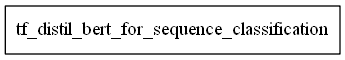

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

In [25]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_dataset.batch(batch_size),
                       validation_data=val_dataset,
                       epochs=epochs)

Epoch 1/4


ResourceExhaustedError:  OOM when allocating tensor with shape[8,12,512,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node tf_distil_bert_for_sequence_classification/distilbert/transformer/layer_._3/attention/transpose_1
 (defined at C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py:179)
]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_23435]

Errors may have originated from an input operation.
Input Source operations connected to node tf_distil_bert_for_sequence_classification/distilbert/transformer/layer_._3/attention/transpose_1:
In[0] tf_distil_bert_for_sequence_classification/distilbert/transformer/layer_._3/attention/Reshape_1:	
In[1] tf_distil_bert_for_sequence_classification/distilbert/transformer/layer_._3/attention/transpose_1/perm:

Operation defined at: (most recent call last)
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\FRANCE~1\AppData\Local\Temp/ipykernel_2852/2952165569.py", line 1, in <module>
>>>     history = model.fit(train_dataset.batch(batch_size),
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\transformers\modeling_tf_utils.py", line 796, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 800, in call
>>>     distilbert_output = self.distilbert(
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 418, in call
>>>     tfmr_output = self.transformer(
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 314, in call
>>>     for i, layer_module in enumerate(self.layer):
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 318, in call
>>>     layer_outputs = layer_module(hidden_state, attn_mask, head_mask[i], output_attentions, training=training)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 266, in call
>>>     sa_output = self.attention(x, x, x, attn_mask, head_mask, output_attentions, training=training)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 186, in call
>>>     k = shape(self.k_lin(key))  # (bs, n_heads, k_length, dim_per_head)
>>> 
>>>   File "C:\Users\Francesco\anaconda3\envs\ta\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 179, in shape
>>>     return tf.transpose(tf.reshape(x, (bs, -1, self.n_heads, dim_per_head)), perm=(0, 2, 1, 3))
>>> 